<a href="https://colab.research.google.com/github/JeetVyas25/JeetVyas25/blob/main/FaceMaskDetectionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extracting the Dataset')

Extracting the Dataset


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1656.jpg', 'with_mask_1326.jpg', 'with_mask_3196.jpg', 'with_mask_2094.jpg', 'with_mask_2080.jpg']
['with_mask_2802.jpg', 'with_mask_3467.jpg', 'with_mask_1963.jpg', 'with_mask_2362.jpg', 'with_mask_1845.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2510.jpg', 'without_mask_554.jpg', 'without_mask_1282.jpg', 'without_mask_3027.jpg', 'without_mask_725.jpg']
['without_mask_3321.jpg', 'without_mask_578.jpg', 'without_mask_3236.jpg', 'without_mask_1837.jpg', 'without_mask_48.jpg']


In [ ]:
print('Number of masked images' , len(with_mask_files))
print('Number of without masked images' , len(without_mask_files))

Number of masked images 3725
Number of without masked images 3828


In [ ]:
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


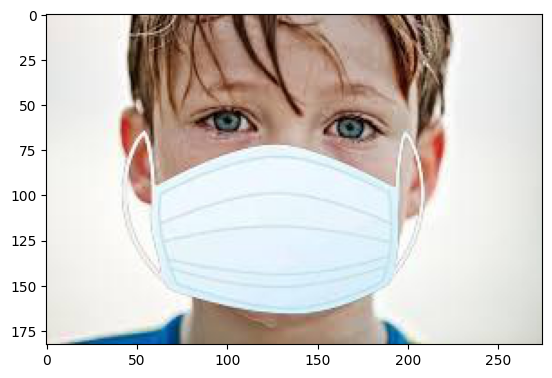

In [ ]:
img = mpimg.imread('/content/data/with_mask/with_mask_1656.jpg')
imgplot = plt.imshow(img)
plt.show()

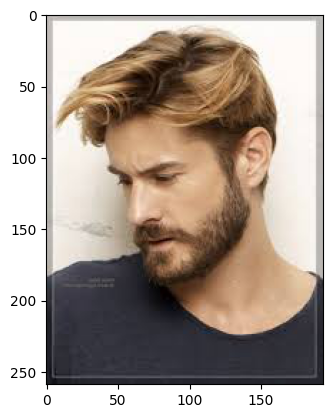

In [ ]:
img = mpimg.imread('/content/data/without_mask/without_mask_2510.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
with_mask_path = '/content/data/with_mask/'

data = []

for img in with_mask_files:

  image = Image.open(with_mask_path + img )
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + str(img_file))
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

In [ ]:
data[0]

array([[[237, 232, 229],
        [238, 233, 230],
        [239, 234, 231],
        ...,
        [226, 225, 223],
        [224, 223, 221],
        [223, 222, 220]],

       [[237, 232, 229],
        [238, 233, 230],
        [239, 234, 231],
        ...,
        [226, 225, 223],
        [224, 223, 221],
        [223, 222, 220]],

       [[237, 232, 229],
        [238, 233, 230],
        [239, 234, 231],
        ...,
        [226, 225, 223],
        [224, 223, 221],
        [223, 222, 220]],

       ...,

       [[230, 223, 215],
        [231, 231, 221],
        [233, 235, 227],
        ...,
        [212, 213, 205],
        [210, 211, 203],
        [209, 210, 202]],

       [[236, 227, 220],
        [236, 235, 226],
        [234, 237, 228],
        ...,
        [211, 212, 204],
        [209, 210, 202],
        [207, 208, 200]],

       [[239, 227, 221],
        [235, 233, 224],
        [229, 232, 223],
        ...,
        [210, 211, 203],
        [207, 208, 200],
        [205, 206, 198]]

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [ ]:
print(X_train[0])

[[[ 18  16  19]
  [ 23  21  24]
  [ 28  26  29]
  ...
  [ 32  27  34]
  [ 97  92  99]
  [161 156 163]]

 [[ 24  22  25]
  [ 27  25  28]
  [ 31  29  32]
  ...
  [ 34  30  37]
  [ 78  74  81]
  [125 120 127]]

 [[ 29  27  30]
  [ 31  29  32]
  [ 32  31  33]
  ...
  [ 44  41  48]
  [ 63  59  66]
  [ 86  82  89]]

 ...

 [[ 33  13   5]
  [ 29   8   2]
  [ 23   3   0]
  ...
  [ 55  23   8]
  [ 64  29  12]
  [ 71  34  15]]

 [[ 31  11   4]
  [ 27   8   2]
  [ 22   3   0]
  ...
  [ 55  23   8]
  [ 64  29  12]
  [ 71  34  15]]

 [[ 30  11   4]
  [ 27   8   2]
  [ 23   4   0]
  ...
  [ 57  24   8]
  [ 66  31  13]
  [ 72  35  16]]]


In [ ]:
print(X_train_scaled[0])

[[[0.07058824 0.0627451  0.0745098 ]
  [0.09019608 0.08235294 0.09411765]
  [0.10980392 0.10196078 0.11372549]
  ...
  [0.1254902  0.10588235 0.13333333]
  [0.38039216 0.36078431 0.38823529]
  [0.63137255 0.61176471 0.63921569]]

 [[0.09411765 0.08627451 0.09803922]
  [0.10588235 0.09803922 0.10980392]
  [0.12156863 0.11372549 0.1254902 ]
  ...
  [0.13333333 0.11764706 0.14509804]
  [0.30588235 0.29019608 0.31764706]
  [0.49019608 0.47058824 0.49803922]]

 [[0.11372549 0.10588235 0.11764706]
  [0.12156863 0.11372549 0.1254902 ]
  [0.1254902  0.12156863 0.12941176]
  ...
  [0.17254902 0.16078431 0.18823529]
  [0.24705882 0.23137255 0.25882353]
  [0.3372549  0.32156863 0.34901961]]

 ...

 [[0.12941176 0.05098039 0.01960784]
  [0.11372549 0.03137255 0.00784314]
  [0.09019608 0.01176471 0.        ]
  ...
  [0.21568627 0.09019608 0.03137255]
  [0.25098039 0.11372549 0.04705882]
  [0.27843137 0.13333333 0.05882353]]

 [[0.12156863 0.04313725 0.01568627]
  [0.10588235 0.03137255 0.00784314]


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
heist = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 15s 23ms/step - loss: 0.4943 - acc: 0.7786 - val_loss: 0.3181 - val_acc: 0.8612
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2884 - acc: 0.8836 - val_loss: 0.2460 - val_acc: 0.8876
Epoch 3/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2427 - acc: 0.9031 - val_loss: 0.2406 - val_acc: 0.8826
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.1909 - acc: 0.9242 - val_loss: 0.2181 - val_acc: 0.9124
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1527 - acc: 0.9419 - val_loss: 0.2214 - val_acc: 0.9157


In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.1743 - acc: 0.9338
Test Accuracy = 0.9338186383247375


Enter path of the predicted image: /content/WhatsApp Image 2023-05-31 at 16.23.42-removebg-preview.jpg


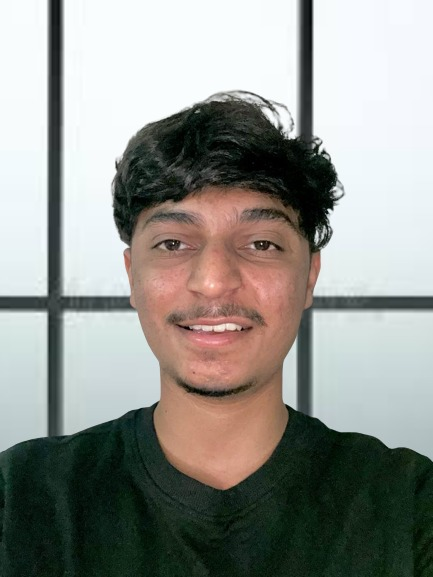

1/1 [==============================] - 0s 31ms/step
[[0.01052734 0.99903655]]
1
The person in the image is not wearing a mask


In [89]:
input_image_path = input('Enter path of the predicted image: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')